Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [24]:
# Read league of legends data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
df = pd.read_csv('../data/league-of-legends/high_diamond_ranked_10min.csv')

Your code starts here:

In [2]:
# Get Pandas Profiling Report
from pandas_profiling import ProfileReport
ProfileReport(df, minimal=True).to_notebook_iframe()

In [3]:
from sklearn.model_selection import train_test_split

def wrangle(X, target):
    """Wrangle train, validate, and test sets in the same way"""

    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # Dropping 'gameId' column due to being unrelated to the outcome of the match
    dropped = ['gameId']
    
    # 'redFirstBlood' is redundant since it will always be the opposite of blueFirstBlood
    dropped.append('redFirstBlood')

    # 'blueDeaths' and 'redDeaths' are redundant since they are the same as 'redKills' and 'blueKills'
    dropped.append('redDeaths')
    dropped.append('blueDeaths')
    
    X.drop(columns=dropped, inplace=True)
    
    # Split df into train & test. 80/20 split.
    train, test = train_test_split(X, test_size=0.20,
                               stratify=X[target], random_state=42)

    # Split train into train & val. 80/20 split.
    train, val = train_test_split(train, test_size=0.20,
                               stratify=train[target], random_state=42)
    
    # return the wrangled dataframe
    return train, val, test

In [4]:
# Setting target to blueWins
target = 'blueWins'
train, val, test = wrangle(df, target)

In [8]:
# Arrange data into X features matrix and y target vector
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [9]:
# converting target into a list to find the majority class
# using value_counts(normalize=True) to find the accuracy score
y = y_train.values.tolist()
majority_class = max(set(y), key = y.count)
print(f'Majority Class: {majority_class}')
print(f'Accuracy Score: {y_train.value_counts(normalize=True)[0]:,.2f}')

Majority Class: 0
Accuracy Score: 0.50


In [62]:
from sklearn.linear_model import LogisticRegression

# Instantiate model
log_model = LogisticRegression(random_state=42, n_jobs=-1)

# Fit model on training data
log_model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [12]:
columns = pd.DataFrame(X_train.columns, columns = ['features'])
coef = pd.DataFrame(log_model.coef_[0], columns = ['coefficients'])
importance = pd.concat([columns, coef], axis = 1)
importance.sort_values(by = 'coefficients', ascending = False)

,features,coefficients
13,blueTotalJungleMinionsKilled,0.012612
29,redTotalMinionsKilled,0.004086
5,blueEliteMonsters,0.002132
6,blueDragons,0.002016
21,redAssists,0.000786
30,redTotalJungleMinionsKilled,0.000474
2,blueFirstBlood,0.000444
33,redCSPerMin,0.000409
18,redWardsPlaced,0.000222
14,blueGoldDiff,0.000192


In [13]:
# Check performance metric (accuracy) on train, validation, and test sets
print('Training Accuracy:', log_model.score(X_train, y_train))
print('Validating Accuracy:', log_model.score(X_val, y_val))
print('Testing Accuracy:', log_model.score(X_test, y_test))

Training Accuracy: 0.73157228725087
Validating Accuracy: 0.7318153067678684
Testing Accuracy: 0.7226720647773279


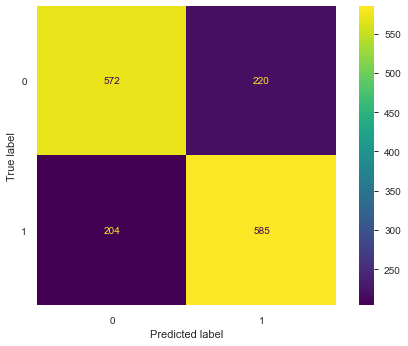

In [14]:
from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(log_model, X_val, y_val, values_format='.0f')

In [15]:
y_pred = log_model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       792
           1       0.73      0.74      0.73       789

    accuracy                           0.73      1581
   macro avg       0.73      0.73      0.73      1581
weighted avg       0.73      0.73      0.73      1581



In [63]:
from sklearn.metrics import plot_roc_curve

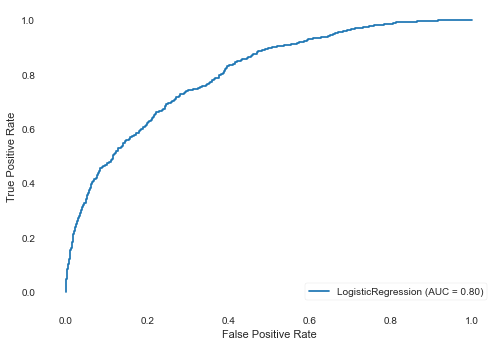

In [64]:
plot_roc_curve(log_model, X_test, y_test)

In [59]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

print('training accuracy:', tree_model.score(X_train, y_train))
print('validation accuracy:', tree_model.score(X_val, y_val))

training accuracy: 1.0
validation accuracy: 0.6325110689437066


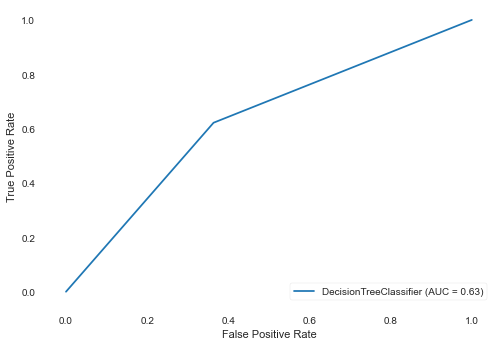

In [60]:
plot_roc_curve(tree_model, X_test, y_test)

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

print('training accuracy:', rf_model.score(X_train, y_train))
print('validation accuracy:', rf_model.score(X_val, y_val))

training accuracy: 1.0
validation accuracy: 0.7235926628716003


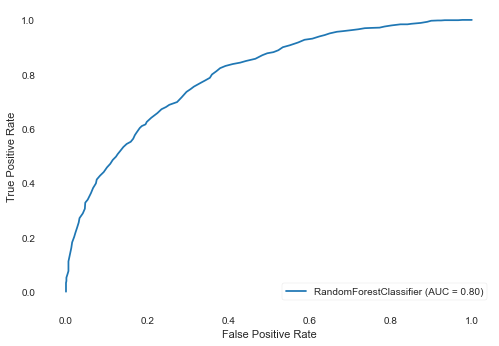

In [58]:
plot_roc_curve(rf_model, X_test, y_test)

In [65]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(
    StandardScaler(), 
    LinearSVC(random_state=0, dual=False, tol=1e-5)
)

clf.fit(X_train, y_train)

print('training accuracy:', clf.score(X_train, y_train))
print('validation accuracy:', clf.score(X_val, y_val))

training accuracy: 0.7360012654223347
validation accuracy: 0.7229601518026565


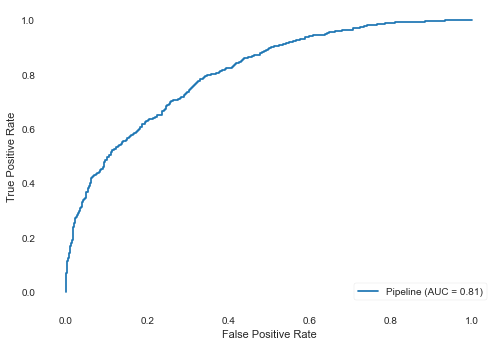

In [56]:
plot_roc_curve(clf, X_test, y_test)